In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


### Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets: pip install vega_datasets

In [2]:

df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
#make date the index
df= df.set_index("date").sort_index()

In [6]:
#check head
df.head(20)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
2010-01-01 05:00:00,45.8
2010-01-01 06:00:00,45.9
2010-01-01 07:00:00,45.9
2010-01-01 08:00:00,46.4


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [7]:
#resample by day
df_daily = df.resample("D").mean()
df_daily.head(2)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167


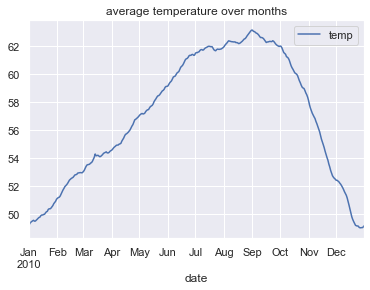

In [8]:
#visualise average temp
df_daily.plot()
plt.title("average temperature over months")
plt.legend()
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.


<Figure size 1008x720 with 0 Axes>

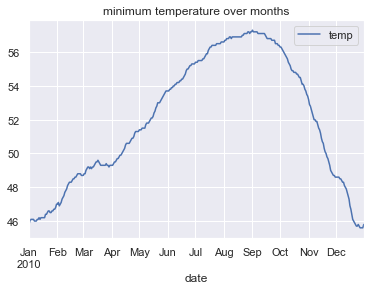

In [9]:
plt.figure(figsize = (14,10))
df.resample("D").min().plot() 
plt.title("minimum temperature over months")
plt.legend()
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

<Figure size 1008x720 with 0 Axes>

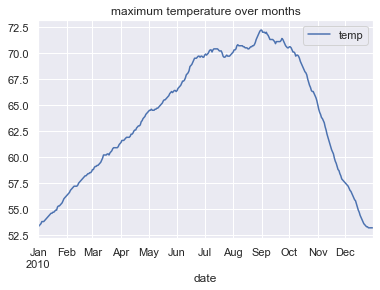

In [10]:
plt.figure(figsize = (14,10))
df.resample("D").max().plot() 
plt.title("maximum temperature over months")
plt.legend()
plt.show()

#### 4. Which month is the coldest, on average?

In [11]:
#resample by months and take mean
df.resample("M").mean().sort_values(by = "temp").head(1)

,temp
date,
2010-01-31,49.98414


In [12]:
#or
df.resample("M").mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

#### 5. Which month has the highest average temperature?

In [13]:
df.resample("M").mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

#### 6.Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [14]:
#make min_max dataframe with daily min and max temp 
min_max = df.resample("D").agg(["min","max"])["temp"]
min_max.head(3)

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5


In [15]:
#difference of max and min
min_max["diff"] = min_max["max"] - min_max["min"]
min_max.head(3)

,min,max,diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4


In [16]:
#resample min_max by months and use idxmax
min_max.resample("M").max()["diff"].idxmax()

Timestamp('2010-08-31 00:00:00', freq='M')

In [17]:
#or resample min_max by months and use sort value
min_max.resample("M").diff.max().sort_values(ascending= False).head(1)

date
2010-08-31    15.0
Name: diff, dtype: float64

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

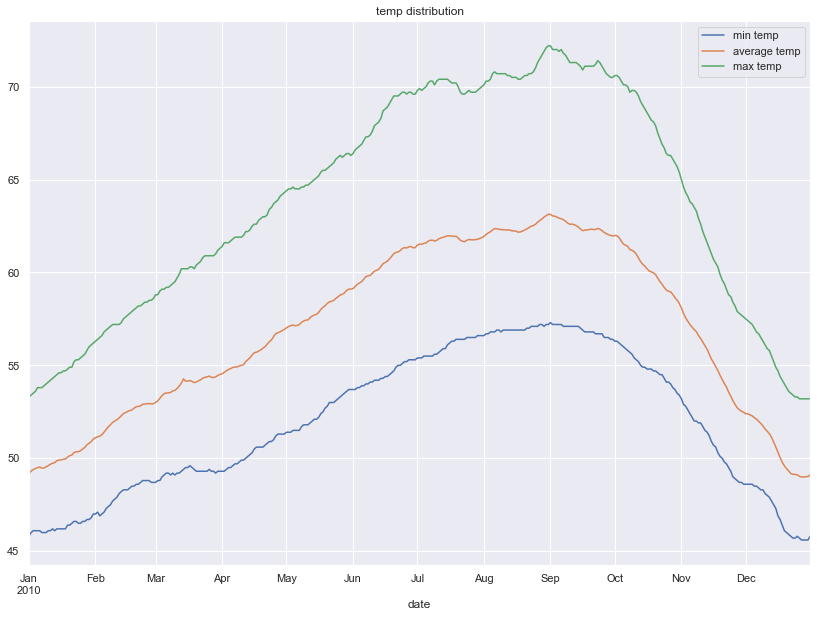

In [18]:
#visualise min,mean and max of daily temperature
plt.figure(figsize = (14,10))
df.resample("D").min().temp.plot(label = "min temp")
df.resample("D").mean().temp.plot(label = "average temp")
df.resample("D").max().temp.plot(label = "max temp")

plt.title("temp distribution")
plt.legend()
plt.show()

### Seattle weather

In [2]:
#pull data
from vega_datasets import data
df = data.seattle_weather()

In [3]:
#peek data
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [21]:
#get shape
df.shape

(1461, 6)

In [22]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [4]:
#make date as index
df = df.set_index("date").sort_index()

In [24]:
#see the spread of date
df.sample(5)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2013-07-14,0.0,27.8,12.8,3.0,sun
2013-04-15,0.0,13.9,4.4,2.4,fog
2014-06-15,0.5,18.3,10.0,3.6,fog
2012-08-21,0.0,23.3,13.3,3.0,rain
2013-10-02,5.3,12.8,9.4,2.4,fog


### Use the dataset to answer the following questions:

#### 1. Which year and month combination has the highest amount of precipitation?


In [25]:
#resample by month and find idxmax for precipation
df.resample("M").sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [26]:
# or by sort values
df.resample("M").sum().sort_values(by = "precipitation",ascending = False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


#### 2. Visualize the amount of monthly precipitation over time.

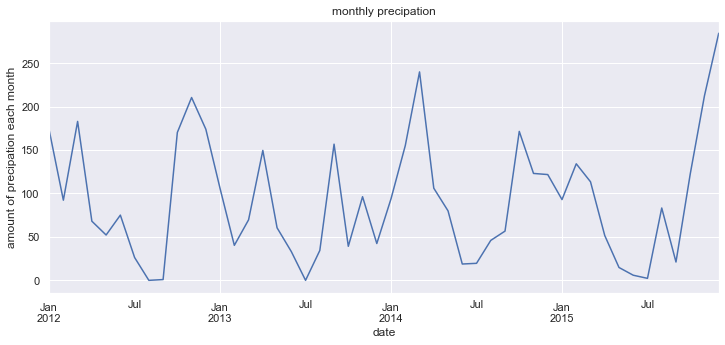

In [27]:
#visualise precipation over time
plt.figure(figsize = (12,5))
df.resample("M").sum().precipitation.plot(title = "monthly precipation",ylabel = "amount of precipation each month")

plt.show()

#### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


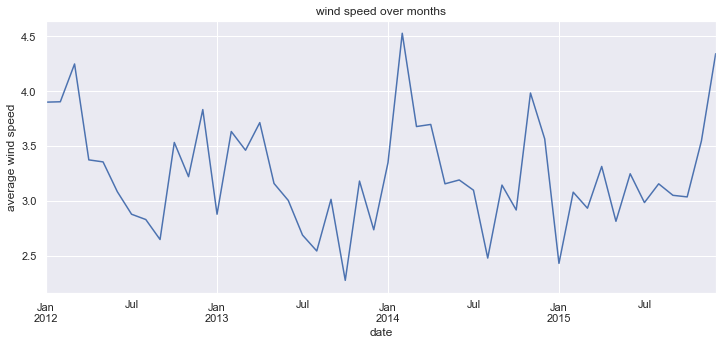

In [28]:
#visualise amount wind over time
plt.figure(figsize = (12,5))
df.resample("M").mean().wind.plot()
plt.title("wind speed over months")
plt.ylabel("average wind speed")
plt.show()

#### 4. Which year-month combination is the windiest?

In [29]:
#lets take mean of windspeed of each month
df.resample("M").mean().sort_values(by = "wind",ascending =  False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


#### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [30]:
#mask weather as sunny
df[df.weather == "sun"].resample("Y").count().sort_values(by = "weather", ascending=False).head(2)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-12-31,211,211,211,211,211
2013-12-31,205,205,205,205,205


#### 6. In which month does it rain the most?

In [5]:
#make month column
df["month"] = df.index.month_name()
df.head(1)

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January


In [6]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [7]:
#make rain column
df["is_rainy"] = df.weather == "rain"
df.head(4)

,precipitation,temp_max,temp_min,wind,weather,month,is_rainy
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,False
2012-01-02,10.9,10.6,2.8,4.5,rain,January,True
2012-01-03,0.8,11.7,7.2,2.3,rain,January,True
2012-01-04,20.3,12.2,5.6,4.7,rain,January,True


In [11]:
df.groupby("month").sum().sort_values(by = "is_rainy", ascending = False).head(1)

,precipitation,temp_max,temp_min,wind,is_rainy
month,,,,,
February,422.0,1114.2,458.2,427.9,40


In [13]:
#or
df.groupby("month").sum().is_rainy.idxmax()

'February'

#### 7. Which month has the most number of days with a non-zero amount of precipitation?


In [14]:
df.head(1)

,precipitation,temp_max,temp_min,wind,weather,month,is_rainy
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,False


In [34]:
df[df.precipitation>0].groupby("month").precipitation.count().max()

81

In [35]:
df[df.precipitation>0].groupby("month").precipitation.count().idxmax()

'December'

### data.flights_20k()

In [6]:
#pull data
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [7]:
#set time as index
df = df.set_index("date").sort_index()

In [8]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### 1. Convert any negative delays to 0.

In [9]:
#convert using np.where
df.delay = np.where(df.delay < 0 , 0, df.delay)

In [10]:
#see the change
df.delay.head()

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00     0
2001-01-01 07:00:00     0
2001-01-01 07:00:00     0
Name: delay, dtype: int64

#### 2. Which hour of the day has the highest average delay?

In [12]:
#make hoiur column
df["hour"] = df.index.hour

In [13]:
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [16]:
df.groupby("hour").delay.mean().idxmax()

3

In [17]:
df.groupby("hour").delay.mean().max()

302.5

#### 3.Does the day of the week make a difference in the delay amount?


In [19]:
#make day column
df["day"]=df.index.day_name()

In [20]:
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


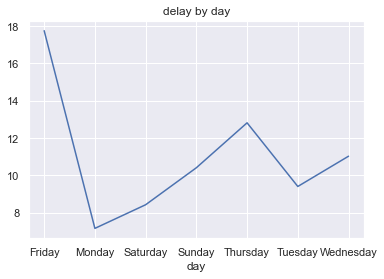

In [26]:
df.groupby("day").delay.mean().plot(title ="delay by day")
plt.show()

    friday is more delay

#### 4. Does the month make a difference in the delay amount?


In [27]:
#create month column
df["month"] = df.index.month_name()

In [28]:
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


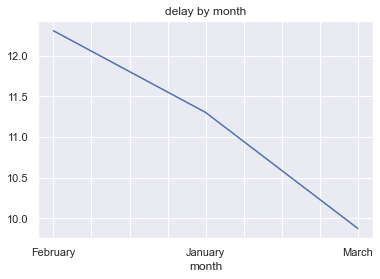

In [31]:
df.groupby("month").delay.mean().plot(title = "delay by month")
plt.show()

    feburary has most delays

### Bonus